# TensorFlow 张量的常用操作

> 本文内容整理自 https://github.com/dragen1860/Deep-Learning-with-TensorFlow-book

本文主要内容
+ 数据类型：`dtype=int32, float32, string, bool`
+ 创建张量：`tf.convert_to_tensor, tf.constant, tf.zeros, tf.ones, tf.zeros_like, tf.fill, tf.random.normal, tf.random.uniform, tf.range`
+ 索引与切片：`A[1][2][1], A[1, 2, 1], A[ :, :, 0:3:2], A[..., 0:3:2]`
+ 维度变换：`tf.reshape, tf.expand_dims, tf.squeeze, tf.transpose`
+ 数据复制：`tf.tile`
+ 数学运算：`+, -, *, /, //, %, **, tf.pow, tf.square, tf.sqrt, tf.math.log, tf.matmul, @`
+ 合并与分割：`tf.concat, tf.stack, tf.split, tf.unstack`
+ 统计量：`tf.norm, tf.reduce_max min mean sum, tf.argmax, tf.argmin`
+ 张量比较：`tf.equal`
+ 填充与复制：`tf.pad, tf.keras.preprocessing.sequence.pad_sequences, tf.tile`
+ 数据限幅：`tf.maximum, tf.minimum, tf.clip_by_value`
+ 数据收集：`tf.gather, tf.gather_nd`
+ 掩码：`tf.boolean_mask`
+ 条件：`tf.where`
+ 数据刷新：`tf.scatter_nd`
+ 采样：`tf.meshgrid` 

In [1]:
import tensorflow as tf
import numpy  as np

## 数据类型

### 数值类型

1. 标量，0维张量，主要用于模型损失和各种测量指标的表示，比如准确率、精度等；
2. 向量，1维张量，主要用于表示模型权重中的偏置b；
3. 矩阵，2维张量，主要用于表示线性模型Dense中的权重矩阵W；
4. 张量，3维张量主要用于序列数据，它的格式是 `[batch_size, sequence length, feature length]`，比如自然语言处理中句子的嵌入表示 `[批量大小，句子长度，词嵌入维度]`。4维张量主要用于图像数据，它的格式是 `[batch_size, length, width, channel]`。更高维度张量较少使用。

In [2]:
tf.random.uniform([], 0, 100)

<tf.Tensor: shape=(), dtype=float32, numpy=60.91398>

In [3]:
tf.random.uniform([0], 0, 100)

<tf.Tensor: shape=(0,), dtype=float32, numpy=array([], dtype=float32)>

In [4]:
tf.random.uniform([1], 0, 100)

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([7.7142477], dtype=float32)>

In [5]:
tf.random.uniform([3], 0, 100)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([33.064316, 51.308205, 36.189606], dtype=float32)>

In [6]:
tf.random.uniform([2, 3], 0, 100)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[54.413162,  8.49278 ,  3.885436],
       [39.724277, 23.792912, 49.859512]], dtype=float32)>

In [7]:
tf.random.uniform([2, 3, 2], 0, 100)

<tf.Tensor: shape=(2, 3, 2), dtype=float32, numpy=
array([[[68.361786 , 43.884647 ],
        [48.275005 , 42.41606  ],
        [19.369041 , 89.4353   ]],

       [[35.5667   , 71.48719  ],
        [68.52201  , 22.814072 ],
        [ 1.2524724, 98.58983  ]]], dtype=float32)>

### 字符串类型

In [8]:
a = tf.constant('Hello, Deep Learning.')
a

<tf.Tensor: shape=(), dtype=string, numpy=b'Hello, Deep Learning.'>

In [9]:
a.numpy(), a.numpy().decode('utf-8')

(b'Hello, Deep Learning.', 'Hello, Deep Learning.')

### 布尔类型

In [10]:
tf.constant(True)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [11]:
tf.constant([True, False])

<tf.Tensor: shape=(2,), dtype=bool, numpy=array([ True, False])>

In [12]:
tf.constant(True) == True

<tf.Tensor: shape=(), dtype=bool, numpy=True>

## 创建张量

In [13]:
tf.convert_to_tensor(np.random.uniform(-3, 3, size=(2, 3)))

<tf.Tensor: shape=(2, 3), dtype=float64, numpy=
array([[-1.9451857 , -2.44664735, -0.76260971],
       [ 0.27607199,  2.71134657,  2.51509479]])>

In [14]:
tf.convert_to_tensor(np.random.uniform(-3, 3, size=(2, 3)), dtype=tf.float32)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 0.00291547,  0.96632254,  0.27051163],
       [ 1.1224718 , -2.4368591 ,  1.6584569 ]], dtype=float32)>

In [15]:
tf.constant([[1, 2], [3, 4]], dtype=tf.float64)

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[1., 2.],
       [3., 4.]])>

In [16]:
tf.zeros(shape=[2, 3]), tf.ones(shape=[2, 3])

(<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
 array([[0., 0., 0.],
        [0., 0., 0.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 3), dtype=float32, numpy=
 array([[1., 1., 1.],
        [1., 1., 1.]], dtype=float32)>)

In [17]:
tf.zeros_like(tf.constant([[1, 2], [3, 4]], dtype=tf.float64))

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[0., 0.],
       [0., 0.]])>

In [18]:
tf.fill([2, 3], 3.14)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14]], dtype=float32)>

In [19]:
tf.random.normal([1, 2])

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[1.0969983 , 0.34224465]], dtype=float32)>

In [20]:
tf.random.uniform([2, 3], -5, 5, tf.float16)

<tf.Tensor: shape=(2, 3), dtype=float16, numpy=
array([[ 0.7734,  4.133 ,  0.1172],
       [ 4.453 ,  0.293 , -3.242 ]], dtype=float16)>

In [21]:
tf.range(1, 9, 2)

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([1, 3, 5, 7], dtype=int32)>

## 索引与切片

In [22]:
A = tf.reshape(tf.range(24), shape=[2, 3, 4])
A

<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]], dtype=int32)>

In [23]:
A[1][2][1], A[1, 2, 1]

(<tf.Tensor: shape=(), dtype=int32, numpy=21>,
 <tf.Tensor: shape=(), dtype=int32, numpy=21>)

In [24]:
A[1][2], A[1, 2]

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([20, 21, 22, 23], dtype=int32)>,
 <tf.Tensor: shape=(4,), dtype=int32, numpy=array([20, 21, 22, 23], dtype=int32)>)

In [25]:
A[ :, :, 0:3:2], A[..., 0:3:2]

(<tf.Tensor: shape=(2, 3, 2), dtype=int32, numpy=
 array([[[ 0,  2],
         [ 4,  6],
         [ 8, 10]],
 
        [[12, 14],
         [16, 18],
         [20, 22]]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3, 2), dtype=int32, numpy=
 array([[[ 0,  2],
         [ 4,  6],
         [ 8, 10]],
 
        [[12, 14],
         [16, 18],
         [20, 22]]], dtype=int32)>)

## 维度变换

### Reshape

必须保证张量新视图的维度顺序要和张量的存储顺序一致，否则是没有意义的。

In [26]:
x = tf.range(96)
x = tf.reshape(x , [2, 4, 4, 3])

In [27]:
x

<tf.Tensor: shape=(2, 4, 4, 3), dtype=int32, numpy=
array([[[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17],
         [18, 19, 20],
         [21, 22, 23]],

        [[24, 25, 26],
         [27, 28, 29],
         [30, 31, 32],
         [33, 34, 35]],

        [[36, 37, 38],
         [39, 40, 41],
         [42, 43, 44],
         [45, 46, 47]]],


       [[[48, 49, 50],
         [51, 52, 53],
         [54, 55, 56],
         [57, 58, 59]],

        [[60, 61, 62],
         [63, 64, 65],
         [66, 67, 68],
         [69, 70, 71]],

        [[72, 73, 74],
         [75, 76, 77],
         [78, 79, 80],
         [81, 82, 83]],

        [[84, 85, 86],
         [87, 88, 89],
         [90, 91, 92],
         [93, 94, 95]]]], dtype=int32)>

In [28]:
x.ndim, x.shape

(4, TensorShape([2, 4, 4, 3]))

In [29]:
tf.reshape(x, [2, -1])

<tf.Tensor: shape=(2, 48), dtype=int32, numpy=
array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
        64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
        80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]],
      dtype=int32)>

In [30]:
tf.reshape(x, [2, 4, 12])

<tf.Tensor: shape=(2, 4, 12), dtype=int32, numpy=
array([[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
        [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
        [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]],

       [[48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
        [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71],
        [72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83],
        [84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]]], dtype=int32)>

In [31]:
tf.reshape(x, [2, -1, 3])

<tf.Tensor: shape=(2, 16, 3), dtype=int32, numpy=
array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23],
        [24, 25, 26],
        [27, 28, 29],
        [30, 31, 32],
        [33, 34, 35],
        [36, 37, 38],
        [39, 40, 41],
        [42, 43, 44],
        [45, 46, 47]],

       [[48, 49, 50],
        [51, 52, 53],
        [54, 55, 56],
        [57, 58, 59],
        [60, 61, 62],
        [63, 64, 65],
        [66, 67, 68],
        [69, 70, 71],
        [72, 73, 74],
        [75, 76, 77],
        [78, 79, 80],
        [81, 82, 83],
        [84, 85, 86],
        [87, 88, 89],
        [90, 91, 92],
        [93, 94, 95]]], dtype=int32)>

### 增删维度

In [32]:
x = tf.random.uniform([3, 3], minval=0, maxval=255, dtype=tf.int32)
x

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[131, 213,  16],
       [ 30, 174, 142],
       [204, 114,  74]], dtype=int32)>

In [33]:
x = tf.expand_dims(x, axis=2)
x

<tf.Tensor: shape=(3, 3, 1), dtype=int32, numpy=
array([[[131],
        [213],
        [ 16]],

       [[ 30],
        [174],
        [142]],

       [[204],
        [114],
        [ 74]]], dtype=int32)>

In [34]:
x = tf.expand_dims(x, axis=0)
x

<tf.Tensor: shape=(1, 3, 3, 1), dtype=int32, numpy=
array([[[[131],
         [213],
         [ 16]],

        [[ 30],
         [174],
         [142]],

        [[204],
         [114],
         [ 74]]]], dtype=int32)>

In [35]:
tf.squeeze(x)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[131, 213,  16],
       [ 30, 174, 142],
       [204, 114,  74]], dtype=int32)>

In [36]:
tf.squeeze(x, axis=0)

<tf.Tensor: shape=(3, 3, 1), dtype=int32, numpy=
array([[[131],
        [213],
        [ 16]],

       [[ 30],
        [174],
        [142]],

       [[204],
        [114],
        [ 74]]], dtype=int32)>

### Transpose

改变视图、增删维度都不会影响张量的存储。在实现算法逻辑时，在保持维度顺序不 变的条件下，仅仅改变张量的理解方式是不够的，有时需要直接调整的存储顺序，即交换 维度(Transpose)。通过交换维度，改变了张量的存储顺序，同时也改变了张量的视图。

In [37]:
A = tf.reshape(tf.range(2*4*2*3), [2, 4, 2, 3])
A

<tf.Tensor: shape=(2, 4, 2, 3), dtype=int32, numpy=
array([[[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23]]],


       [[[24, 25, 26],
         [27, 28, 29]],

        [[30, 31, 32],
         [33, 34, 35]],

        [[36, 37, 38],
         [39, 40, 41]],

        [[42, 43, 44],
         [45, 46, 47]]]], dtype=int32)>

In [38]:
B = tf.transpose(A, perm=[0, 3, 1, 2])
B

<tf.Tensor: shape=(2, 3, 4, 2), dtype=int32, numpy=
array([[[[ 0,  3],
         [ 6,  9],
         [12, 15],
         [18, 21]],

        [[ 1,  4],
         [ 7, 10],
         [13, 16],
         [19, 22]],

        [[ 2,  5],
         [ 8, 11],
         [14, 17],
         [20, 23]]],


       [[[24, 27],
         [30, 33],
         [36, 39],
         [42, 45]],

        [[25, 28],
         [31, 34],
         [37, 40],
         [43, 46]],

        [[26, 29],
         [32, 35],
         [38, 41],
         [44, 47]]]], dtype=int32)>

In [39]:
assert A[0, 2, 1, 2] == B[0, 2, 2, 1]

### 数据复制

### tile

In [40]:
X = tf.reshape(tf.range(8, dtype=tf.float32), [2, 4])
W = tf.ones([4, 3], dtype=tf.float32)
b = tf.reshape(tf.range(3, dtype=tf.float32), [3])

In [41]:
X, W, b

(<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
 array([[0., 1., 2., 3.],
        [4., 5., 6., 7.]], dtype=float32)>,
 <tf.Tensor: shape=(4, 3), dtype=float32, numpy=
 array([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0., 1., 2.], dtype=float32)>)

In [42]:
Y = X@W + b
Y

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 6.,  7.,  8.],
       [22., 23., 24.]], dtype=float32)>

上述加法并没有发生逻辑错误，那么它是怎么实现的呢？这是因为它自动调用 Broadcasting 函数 tf.broadcast_to(x, new_shape)，将 2 者 shape 扩张为相同的[2,3]，即上式可以等效为：

In [43]:
Y1 = X@W + tf.broadcast_to(b, [2, 3])
Y1

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 6.,  7.,  8.],
       [22., 23., 24.]], dtype=float32)>

具体操作如下

In [44]:
b = tf.expand_dims(b, axis=0)
b

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0., 1., 2.]], dtype=float32)>

In [45]:
b = tf.tile(b, multiples=[2, 1])
b

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0., 1., 2.],
       [0., 1., 2.]], dtype=float32)>

In [46]:
Y2 = X@W + b
Y2

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 6.,  7.,  8.],
       [22., 23., 24.]], dtype=float32)>

### broadcast_to

In [47]:
A = tf.random.normal([3, 1])
A

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[-1.9351045 ],
       [ 0.04056639],
       [ 0.35551748]], dtype=float32)>

In [48]:
tf.broadcast_to(A, [2, 2, 3, 2])

<tf.Tensor: shape=(2, 2, 3, 2), dtype=float32, numpy=
array([[[[-1.9351045 , -1.9351045 ],
         [ 0.04056639,  0.04056639],
         [ 0.35551748,  0.35551748]],

        [[-1.9351045 , -1.9351045 ],
         [ 0.04056639,  0.04056639],
         [ 0.35551748,  0.35551748]]],


       [[[-1.9351045 , -1.9351045 ],
         [ 0.04056639,  0.04056639],
         [ 0.35551748,  0.35551748]],

        [[-1.9351045 , -1.9351045 ],
         [ 0.04056639,  0.04056639],
         [ 0.35551748,  0.35551748]]]], dtype=float32)>

## 数学运算

In [49]:
X = tf.ones([2, 3], tf.float32)
X

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [50]:
X + X, X - X, X * X, X / X

(<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
 array([[2., 2., 2.],
        [2., 2., 2.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 3), dtype=float32, numpy=
 array([[0., 0., 0.],
        [0., 0., 0.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 3), dtype=float32, numpy=
 array([[1., 1., 1.],
        [1., 1., 1.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 3), dtype=float32, numpy=
 array([[1., 1., 1.],
        [1., 1., 1.]], dtype=float32)>)

In [51]:
X // X

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [52]:
X % X

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [53]:
x = tf.cast(tf.range(1, 4), tf.float32)
x

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [54]:
tf.pow(x, 3), x**3

(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 1.,  8., 27.], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 1.,  8., 27.], dtype=float32)>)

In [55]:
tf.square(x)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 4., 9.], dtype=float32)>

In [56]:
tf.sqrt(x)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1.       , 1.4142135, 1.7320508], dtype=float32)>

In [57]:
tf.math.log(x)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.       , 0.6931472, 1.0986123], dtype=float32)>

### 矩阵相乘

通过@运算符可以方便的实现矩阵相乘，还可以通过 tf.matmul(a, b)实现。需要注意的是，TensorFlow 中的矩阵相乘可以使用批量方式，也就是张量 a,b 的维度数可以大于 2。当张量 a,b 维度数大于 2 时，TensorFlow 会选择 a,b 的最后两个维度进行矩阵相乘，前面所有的维度都视作 Batch 维 度。根据矩阵相乘的定义，a 和 b 能够矩阵相乘的条件是，a 的倒数第一个维度长度(列)和 b 的倒数第二个维度长度(行)必须相等。比如张量 a shape:[4,3,28,32]可以与张量 b shape:[4,3,32,2]进行矩阵相乘：

In [58]:
a = tf.random.normal([2, 3, 3, 100])
b = tf.random.normal([2, 3, 100, 2])

In [59]:
c = tf.matmul(a, b)
c.shape

TensorShape([2, 3, 3, 2])

矩阵相乘函数支持自动Broadcasting 机制：

In [60]:
b2 = tf.random.normal([100, 2])

In [61]:
c2 = a @ b2
c2.shape

TensorShape([2, 3, 3, 2])

## 合并与分割

张量的合并可以使用拼接(Concatenate)和堆叠 (Stack)操作实现，拼接并不会产生新的维度，而堆叠会创建新维度。选择使用拼接还是堆叠操作来合并张量，取决于具体的场景是否需要创建新维度。

### 合并-拼接

合并是指将多个张量在某个维度上合并为一个张量。以某学校班级成绩册数据为例， 设张量 A 保存了某学校 1-4 号班级的成绩册，每个班级 35 个学生，共 8 门科目，则张量 A 的 shape 为：[4,35,8]；同样的方式，张量 B 保存了剩下的 6 个班级的成绩册，shape 为 [6,35,8]。通过合并 2 个成绩册，便可得到学校所有班级的成绩册张量 C，shape 应为 [10,35,8]。这就是张量合并的意义所在。

In [62]:
a = tf.random.normal([4, 35, 8]) # 模拟成绩册 A 
b = tf.random.normal([6, 35, 8]) # 模拟成绩册 B 

In [63]:
c = tf.concat([a, b], axis=0) # 合并成绩册
c.shape

TensorShape([10, 35, 8])

除了可以在班级维度上进行合并，还可以在其他维度上合并张量。考虑张量 A 保存了 所有班级所有学生的前 4 门科目成绩，shape 为[10,35,4]，张量 B 保存了剩下的 4 门科目 成绩，shape 为[10,35,4]，则可以合并 shape 为[10,35,8]的总成绩册张量：

In [64]:
a = tf.random.normal([10, 35, 4]) 
b = tf.random.normal([10, 35, 4])

In [65]:
c = tf.concat([a, b], axis=2) # 在科目维度拼接
c.shape

TensorShape([10, 35, 8])

### 合并-堆叠

堆叠 tf.concat 直接在现有维度上面合并数据，并不会创建新的维度。如果在合并数据 时，希望创建一个新的维度，则需要使用 tf.stack 操作。考虑张量 A 保存了某个班级的成 绩册，shape 为[35,8]，张量 B 保存了另一个班级的成绩册，shape 为[35,8]。合并这 2 个班 级的数据时，需要创建一个新维度，定义为班级维度，新维度可以选择放置在任意位置， 一般根据大小维度的经验法则，将较大概念的班级维度放置在学生维度之前，则合并后的 张量的新 shape 应为[2,35,8]。

In [66]:
a = tf.random.normal([35, 8]) 
b = tf.random.normal([35, 8]) 

In [67]:
c = tf.stack([a, b], axis=0) # 堆叠合并为 2个班级
c.shape

TensorShape([2, 35, 8])

同样可以选择在其他位置插入新维度，如在最末尾插入：

In [68]:
c2 = tf.stack([a, b], axis=2) # 堆叠合并为 2个班级
c2.shape

TensorShape([35, 8, 2])

此时班级的维度在 axis=2 轴上面，理解时也需要按着最新的维度顺序去理解数据。若选择 使用 tf.concat 上述成绩单，则可以合并为：

In [69]:
c3 = tf.concat([a, b], axis=0) # 拼接方式合并，没有 2个班级的概念
c3.shape

TensorShape([70, 8])

tf.concat 也可以顺利合并数据，但是在理解时，需要按着前 35 个学生来自第一个班级，后 35 个学生来自第二个班级的方式。在这里，明显通过 tf.stack 方式创建新维度的方式更合 理，得到的 shape 为[2,35,8]的张量也更容易理解。

### 分割

通过 tf.split(x, axis, num_or_size_splits)可以完成张量的分割操作，其中 
+ x：待分割张量 
+ axis：分割的维度索引号 
+ num_or_size_splits：切割方案。当 num_or_size_splits 为单个数值时，如 10，表示切割 为 10 份；当 num_or_size_splits 为 List 时，每个元素表示每份的长度，如[2,4,2,2]表示 切割为 4 份，每份的长度分别为 2,4,2,2

In [70]:
x = tf.random.normal([10,35,8])
# 等长切割 
result = tf.split(x, axis=0, num_or_size_splits=10)

In [71]:
len(result), type(result)

(10, list)

In [72]:
result[0].shape

TensorShape([1, 35, 8])

In [73]:
# 自定义长度的切割 
result = tf.split(x, axis=0, num_or_size_splits=[4, 2, 2, 2])

In [74]:
len(result), type(result)

(4, list)

In [75]:
result[0].shape

TensorShape([4, 35, 8])

特别地，如果希望在某个维度上全部按长度为  1 的方式分割，还可以直接使用 tf.unstack(x, axis)。这种方式是 tf.split 的一种特殊情况，切割长度固定为 1，只需要指定切割维度即 可。例如，将总成绩册张量在班级维度进行 unstack：

In [76]:
result = tf.unstack(x, axis=0) # Unstack为长度为 1

In [77]:
len(result), type(result)

(10, list)

In [78]:
result[0].shape

TensorShape([35, 8])

可以看到，通过 tf.unstack 切割后，shape 变为[35,8]，即班级维度消失了，这也是与 tf.split 区别之处。

## 统计量

In [79]:
x = tf.reshape(tf.range(6), [2, 3])
x = tf.cast(x, tf.float32)
x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0., 1., 2.],
       [3., 4., 5.]], dtype=float32)>

In [80]:
tf.norm(x, ord=1) # 计算 L1范数

<tf.Tensor: shape=(), dtype=float32, numpy=15.0>

In [81]:
 tf.norm(x, ord=2) # 计算 L2范数

<tf.Tensor: shape=(), dtype=float32, numpy=7.4161983>

In [82]:
import numpy as np
tf.norm(x, ord=np.inf) # 计算∞范数

<tf.Tensor: shape=(), dtype=float32, numpy=5.0>

In [83]:
tf.reduce_max(x, axis=1) # 统计概率维度上的最大值

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 5.], dtype=float32)>

In [84]:
tf.reduce_min(x, axis=1) # 统计概率维度上的最小值

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0., 3.], dtype=float32)>

In [85]:
tf.reduce_mean(x, axis=1) # 统计概率维度上的均值

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 4.], dtype=float32)>

In [86]:
tf.reduce_sum(x, axis=-1) # 求和

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 3., 12.], dtype=float32)>

In [87]:
# 当不指定 axis 参数时，tf.reduce_*函数会求解出全局元素的最大、最小、均值、和：
tf.reduce_max(x), tf.reduce_min(x), tf.reduce_mean(x), tf.reduce_sum(x)

(<tf.Tensor: shape=(), dtype=float32, numpy=5.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.5>,
 <tf.Tensor: shape=(), dtype=float32, numpy=15.0>)

In [88]:
# 通过 tf.argmax(x, axis)，tf.argmin(x, axis)可以求解在 axis 轴上，x 的最大值、最小值所 在的索引号：
tf.argmax(x, axis=1), tf.argmin(x, axis=1)

(<tf.Tensor: shape=(2,), dtype=int64, numpy=array([2, 2])>,
 <tf.Tensor: shape=(2,), dtype=int64, numpy=array([0, 0])>)

## 张量比较

In [89]:
# tf.equal()函数返回布尔型的张量比较结果。
x = tf.reshape(tf.range(6), [2, 3])

In [90]:
tf.equal(x, x)

<tf.Tensor: shape=(2, 3), dtype=bool, numpy=
array([[ True,  True,  True],
       [ True,  True,  True]])>

类似的函数还有 tf.math.greater、less、greater_wqual、less_equal、not_equal、is_nan等等

## 填充与复制

In [91]:
a = tf.constant([1,2,3,4,5,6])
b = tf.constant([7,8,1,6])

In [92]:
b_pad = tf.pad(b, [[1, 1]])
b_pad

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([0, 7, 8, 1, 6, 0], dtype=int32)>

In [93]:
c = tf.stack([a, b_pad], axis=0) # 合并
c

<tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[1, 2, 3, 4, 5, 6],
       [0, 7, 8, 1, 6, 0]], dtype=int32)>

In [94]:
tf.pad(c, [[1, 2], [1, 2]])

<tf.Tensor: shape=(5, 9), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 2, 3, 4, 5, 6, 0, 0],
       [0, 0, 7, 8, 1, 6, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)>

In [95]:
tf.pad(c, [[1, 2], [1, 2]], constant_values=7)

<tf.Tensor: shape=(5, 9), dtype=int32, numpy=
array([[7, 7, 7, 7, 7, 7, 7, 7, 7],
       [7, 1, 2, 3, 4, 5, 6, 7, 7],
       [7, 0, 7, 8, 1, 6, 0, 7, 7],
       [7, 7, 7, 7, 7, 7, 7, 7, 7],
       [7, 7, 7, 7, 7, 7, 7, 7, 7]], dtype=int32)>

In [96]:
batch_image = tf.random.normal([4, 28, 28, 1])
batch_image.shape

TensorShape([4, 28, 28, 1])

In [97]:
batch_image_pad = tf.pad(batch_image, [[0, 0], [2, 2], [2, 2], [0, 0]], constant_values=0)
batch_image_pad.shape

TensorShape([4, 32, 32, 1])

In [98]:
batch_sentence_ids = [[1, 2], [1, 2, 3, 4], [1,], [1, 2, 3, 4, 5]]

In [99]:
batch_sentence_ids_pad = tf.keras.preprocessing.sequence.pad_sequences(
    batch_sentence_ids , dtype='int32', maxlen=7, truncating='post', padding='post', value=7)

In [100]:
batch_sentence_ids_pad

array([[1, 2, 7, 7, 7, 7, 7],
       [1, 2, 3, 4, 7, 7, 7],
       [1, 7, 7, 7, 7, 7, 7],
       [1, 2, 3, 4, 5, 7, 7]], dtype=int32)

In [101]:
x = tf.constant([[[0.1, 0.2], [0.3, 0.4]], [[0.5, 0.6], [0.7, 0.8]]])
x

<tf.Tensor: shape=(2, 2, 2), dtype=float32, numpy=
array([[[0.1, 0.2],
        [0.3, 0.4]],

       [[0.5, 0.6],
        [0.7, 0.8]]], dtype=float32)>

In [102]:
tf.tile(x, [1, 2, 3]) # 数据复制

<tf.Tensor: shape=(2, 4, 6), dtype=float32, numpy=
array([[[0.1, 0.2, 0.1, 0.2, 0.1, 0.2],
        [0.3, 0.4, 0.3, 0.4, 0.3, 0.4],
        [0.1, 0.2, 0.1, 0.2, 0.1, 0.2],
        [0.3, 0.4, 0.3, 0.4, 0.3, 0.4]],

       [[0.5, 0.6, 0.5, 0.6, 0.5, 0.6],
        [0.7, 0.8, 0.7, 0.8, 0.7, 0.8],
        [0.5, 0.6, 0.5, 0.6, 0.5, 0.6],
        [0.7, 0.8, 0.7, 0.8, 0.7, 0.8]]], dtype=float32)>

## 数据限幅

In [103]:
tf.range(9)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32)>

In [104]:
tf.maximum(tf.range(9), 2) # 下限幅 2

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([2, 2, 2, 3, 4, 5, 6, 7, 8], dtype=int32)>

In [105]:
tf.minimum(tf.range(9), 5) # 上限幅 5

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 5, 5, 5], dtype=int32)>

In [106]:
tf.minimum(tf.maximum(tf.range(9), 2), 5) # 限幅为区间[2, 5]

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([2, 2, 2, 3, 4, 5, 5, 5, 5], dtype=int32)>

In [107]:
tf.clip_by_value(tf.range(9), 2, 5) # 限幅为区间[2, 5]

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([2, 2, 2, 3, 4, 5, 5, 5, 5], dtype=int32)>

## 数据收集

### tf.gather

tf.gather 可以实现根据索引号收集数据的目的，比如应用在词嵌入中。

In [108]:
word_embeddings = tf.random.uniform(shape=[5, 2], dtype=tf.float32)
input_ids = tf.constant([[2, 3, 3, 1], [3, 2, 1, 3]])

In [109]:
word_embeddings, input_ids

(<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
 array([[0.33092535, 0.74536264],
        [0.7488346 , 0.62431705],
        [0.18705177, 0.7914946 ],
        [0.31842375, 0.04676068],
        [0.5133866 , 0.8320302 ]], dtype=float32)>,
 <tf.Tensor: shape=(2, 4), dtype=int32, numpy=
 array([[2, 3, 3, 1],
        [3, 2, 1, 3]], dtype=int32)>)

In [110]:
inputs_embeds = tf.gather(word_embeddings, input_ids)
inputs_embeds

<tf.Tensor: shape=(2, 4, 2), dtype=float32, numpy=
array([[[0.18705177, 0.7914946 ],
        [0.31842375, 0.04676068],
        [0.31842375, 0.04676068],
        [0.7488346 , 0.62431705]],

       [[0.31842375, 0.04676068],
        [0.18705177, 0.7914946 ],
        [0.7488346 , 0.62431705],
        [0.31842375, 0.04676068]]], dtype=float32)>

### tf.gather_nd

In [111]:
x = tf.random.uniform(shape=[3, 2, 5], minval=0, maxval=100, dtype=tf.int32)
x

<tf.Tensor: shape=(3, 2, 5), dtype=int32, numpy=
array([[[54, 73, 46, 36, 66],
        [89, 88, 73, 80, 56]],

       [[74, 73, 27, 81, 49],
        [58, 82, 83, 19, 38]],

       [[48, 37, 23, 52,  1],
        [55, 81,  3, 76, 29]]], dtype=int32)>

In [112]:
tf.stack([x[0, 0], x[1, 1], x[2, 1]], axis=0)

<tf.Tensor: shape=(3, 5), dtype=int32, numpy=
array([[54, 73, 46, 36, 66],
       [58, 82, 83, 19, 38],
       [55, 81,  3, 76, 29]], dtype=int32)>

In [113]:
tf.gather_nd(x, [[0, 0], [1, 1], [2, 1]])

<tf.Tensor: shape=(3, 5), dtype=int32, numpy=
array([[54, 73, 46, 36, 66],
       [58, 82, 83, 19, 38],
       [55, 81,  3, 76, 29]], dtype=int32)>

## 掩码

In [114]:
x = tf.random.uniform(shape=[3, 2, 5], minval=0, maxval=100, dtype=tf.int32)
x

<tf.Tensor: shape=(3, 2, 5), dtype=int32, numpy=
array([[[76, 45, 82, 83, 94],
        [46, 78, 25, 49, 71]],

       [[83, 59, 69, 31, 75],
        [99, 51, 35, 82, 97]],

       [[27, 24, 23, 40, 77],
        [51, 29, 47, 50,  6]]], dtype=int32)>

In [115]:
tf.boolean_mask(x, mask=[True, False, True], axis=0)

<tf.Tensor: shape=(2, 2, 5), dtype=int32, numpy=
array([[[76, 45, 82, 83, 94],
        [46, 78, 25, 49, 71]],

       [[27, 24, 23, 40, 77],
        [51, 29, 47, 50,  6]]], dtype=int32)>

In [116]:
tf.boolean_mask(x, mask=[True, True, True, False, False], axis=2)

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[76, 45, 82],
        [46, 78, 25]],

       [[83, 59, 69],
        [99, 51, 35]],

       [[27, 24, 23],
        [51, 29, 47]]], dtype=int32)>

In [117]:
tf.boolean_mask(x, mask=[[True, True], [False, True], [False, True]])

<tf.Tensor: shape=(4, 5), dtype=int32, numpy=
array([[76, 45, 82, 83, 94],
       [46, 78, 25, 49, 71],
       [99, 51, 35, 82, 97],
       [51, 29, 47, 50,  6]], dtype=int32)>

In [118]:
tf.boolean_mask(x, mask=[[[True, True, True, False, False], [True, True, True, False, False]],
                         [[True, True, True, False, False], [True, True, True, False, False]],
                         [[True, True, True, False, False], [True, True, True, False, False]]])

<tf.Tensor: shape=(18,), dtype=int32, numpy=
array([76, 45, 82, 46, 78, 25, 83, 59, 69, 99, 51, 35, 27, 24, 23, 51, 29,
       47], dtype=int32)>

## 条件

In [119]:
a = tf.ones([3, 5]) # 构造 a为全 1 
b = tf.zeros([3, 5]) # 构造 b为全 0 
# 构造采样条件
cond = tf.constant([[True, False, False, False, True], [False, True, False, False, True], [True, True, False, False, True]]) 
tf.where(cond, a, b) # 根据条件从 a,b中采样

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 1., 0., 0., 1.]], dtype=float32)>

In [120]:
tf.where(cond) # 获取 cond中为 True的元素索引

<tf.Tensor: shape=(7, 2), dtype=int64, numpy=
array([[0, 0],
       [0, 4],
       [1, 1],
       [1, 4],
       [2, 0],
       [2, 1],
       [2, 4]])>

### 提取张量中所有正数的数据和索引

那么这有什么用途呢？考虑一个例子，我们需要提取张量中所有正数的数据和索引。首先 构造张量 a，并通过比较运算得到所有正数的位置掩码：

In [121]:
a = tf.random.normal([3, 5]) # 构造 a
a

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[-0.45253593,  0.70460117,  1.0028962 , -0.46881908,  0.996322  ],
       [-0.06231239,  1.509853  , -0.6855882 ,  0.6097129 , -0.60821134],
       [ 0.7419084 , -0.8140833 , -0.7156129 , -0.14035957, -1.6818206 ]],
      dtype=float32)>

通过比较运算，得到正数的掩码：

In [122]:
mask = a > 0 
mask

<tf.Tensor: shape=(3, 5), dtype=bool, numpy=
array([[False,  True,  True, False,  True],
       [False,  True, False,  True, False],
       [ True, False, False, False, False]])>

通过 tf.where 提取此掩码处 True 元素的索引：

In [123]:
indices = tf.where(mask) # 提取所有大于 0的元素索引
indices

<tf.Tensor: shape=(6, 2), dtype=int64, numpy=
array([[0, 1],
       [0, 2],
       [0, 4],
       [1, 1],
       [1, 3],
       [2, 0]])>

拿到索引后，通过  tf.gather_nd 即可恢复出所有正数的元素：

In [124]:
tf.gather_nd(a, indices) # 提取正数的元素值

<tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.70460117, 1.0028962 , 0.996322  , 1.509853  , 0.6097129 ,
       0.7419084 ], dtype=float32)>

## 数据刷新

通过 tf.scatter_nd(indices, updates, shape)可以高效地刷新张量的部分数据，但是只能在 全 0 张量的白板上面刷新。白板的形状表示为 shape 参数，需要 刷新的数据索引为 indices，新数据为 updates，其中每个需要刷新的数据对应在白板中的位 置，根据 indices 给出的索引位置将 updates 中新的数据依次写入白板中，并返回更新后的 白板张量。

### 向量数据刷新

In [125]:
# 在长度为 8 的白板上，写入了对应位置的数据，一个 4 个新数据被刷新。
# 构造需要刷新数据的位置 
indices = tf.constant([[4], [3], [1], [7]]) 
# 构造需要写入的数据 
updates = tf.constant([4.4, 3.3, 1.1, 7.7]) 
# 在长度为8的全0向量上根据 indices写入 updates 
tf.scatter_nd(indices, updates, [8])

<tf.Tensor: shape=(8,), dtype=float32, numpy=array([0. , 1.1, 0. , 3.3, 4.4, 0. , 0. , 7.7], dtype=float32)>

### 矩阵数据刷新

In [126]:
# 构造需要刷新数据的位置 
indices = tf.constant([[1], [3]]) 
# 构造写入数据
updates = tf.constant([[3, 3, 3, 3], [1, 1, 1, 1]])
# 在 shape为[5,4]白板上根据 indices写入 updates 
tf.scatter_nd(indices, updates, [5, 4])

<tf.Tensor: shape=(5, 4), dtype=int32, numpy=
array([[0, 0, 0, 0],
       [3, 3, 3, 3],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 0, 0, 0]], dtype=int32)>

### 3维张量数据刷新

In [127]:
 # 构造写入位置 
indices = tf.constant([[1], [3]]) 
# 构造写入数据 
updates = tf.constant([
[[5,5,5,5], [6,6,6,6], [7,7,7,7], [8,8,8,8]], 
[[1,1,1,1], [2,2,2,2], [3,3,3,3], [4,4,4,4]] 
]) 
# 在 shape为[4,4,4]白板上根据 indices写入 updates，
# 可以看到，数据被刷新到第 2,4 个通道特征图上。
tf.scatter_nd(indices,updates,[4, 4, 4])

<tf.Tensor: shape=(4, 4, 4), dtype=int32, numpy=
array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[5, 5, 5, 5],
        [6, 6, 6, 6],
        [7, 7, 7, 7],
        [8, 8, 8, 8]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3],
        [4, 4, 4, 4]]], dtype=int32)>

## 采样

通过 tf.meshgrid 可以方便地生成二维网格采样点坐标，方便可视化等应用场合。考虑 2 个自变量 x,y 的 Sinc 函数表达式为：

$$z = \frac {sin(x^2 + y^2)}{x^2 + y^2}$$

如果需要绘制函数在𝑥 ∈ [−8,8], 𝑦 ∈ [−8,8]区间的 Sinc 函数的 3D 曲面，则 首先需要生成 x,y 的网格点坐标{(𝑥, 𝑦)}，这样才能通过 Sinc 函数的表达式计算函数在每个 (𝑥, 𝑦)位置的输出值 z。

In [128]:
x = tf.linspace(-8., 8, 50) # 设置 x坐标的间隔 
y = tf.linspace(-8., 8, 100) # 设置 y坐标的间隔 
x, y = tf.meshgrid(x, y) # 生成网格点，并拆分后返回 
x.shape, y.shape # 打印拆分后的所有点的  x,y坐标张量 shape

(TensorShape([100, 50]), TensorShape([100, 50]))

In [129]:
x[0], y[0]

(<tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([-8.        , -7.6734695 , -7.3469386 , -7.020408  , -6.6938777 ,
        -6.367347  , -6.0408163 , -5.714286  , -5.3877554 , -5.0612245 ,
        -4.734694  , -4.408163  , -4.0816326 , -3.7551022 , -3.4285717 ,
        -3.1020408 , -2.7755103 , -2.4489799 , -2.122449  , -1.7959185 ,
        -1.469388  , -1.1428571 , -0.8163266 , -0.48979616, -0.16326523,
         0.16326523,  0.48979568,  0.81632614,  1.1428566 ,  1.469388  ,
         1.7959185 ,  2.122449  ,  2.4489794 ,  2.7755098 ,  3.1020403 ,
         3.4285707 ,  3.7551022 ,  4.0816326 ,  4.408163  ,  4.7346935 ,
         5.061224  ,  5.3877544 ,  5.714286  ,  6.0408163 ,  6.367347  ,
         6.693877  ,  7.0204077 ,  7.346938  ,  7.6734695 ,  8.        ],
       dtype=float32)>, <tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([-8., -8., -8., -8., -8., -8., -8., -8., -8., -8., -8., -8., -8.,
        -8., -8., -8., -8., -8., -8., -8., -8., -8., -8., -8., -8., -8.,
    

In [130]:
z = tf.sqrt(x**2+y**2) 
z = tf.sin(z)/z # sinc函数实现

In [131]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

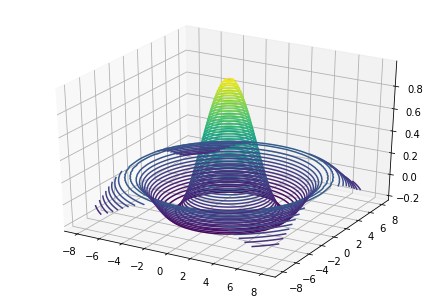

In [132]:
fig = plt.figure() 
ax = Axes3D(fig) 
# 根据网格点绘制 sinc函数 3D曲面 
ax.contour3D(x.numpy(), y.numpy(), z.numpy(), 50) 
plt.show()